In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from datetime import timedelta, datetime

In [48]:
df = pd.read_csv("../datasets/dataset_mood_smartphone.csv")

# Add end date to actions with a lenght
df.insert(5, "endTime", None)

withDurationCat = ["screen","appCat.builtin", "appCat.communication", "appCat.entertainment", "appCat.finance",
                                  "appCat.game", "appCat.office", "appCat.other", "appCat.social", "appCat.travel",
                                  "appCat.unknown", "appCat.utilities", "appCat.weather"]

df.loc[df["variable"].isin(withDurationCat), "endTime"] = pd.to_datetime(df[df["variable"].isin(withDurationCat)]["time"]) + pd.to_timedelta(df[df["variable"].isin(withDurationCat)]["value"], unit="s")

print(df.head)


<bound method NDFrame.head of         Unnamed: 0       id                     time        variable   value  \
0                1  AS14.01  2014-02-26 13:00:00.000            mood   6.000   
1                2  AS14.01  2014-02-26 15:00:00.000            mood   6.000   
2                3  AS14.01  2014-02-26 18:00:00.000            mood   6.000   
3                4  AS14.01  2014-02-26 21:00:00.000            mood   7.000   
4                5  AS14.01  2014-02-27 09:00:00.000            mood   6.000   
...            ...      ...                      ...             ...     ...   
376907     2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032   
376908     2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008   
376909     2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026   
376910     2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033   
376911     2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431   

         

Average number of entries per day per user:
time        id     
2014-02-17  AS14.01      2
            AS14.02      6
            AS14.03      1
            AS14.06      5
            AS14.08      4
                      ... 
2014-06-05  AS14.24    288
2014-06-06  AS14.24    302
2014-06-07  AS14.24    142
2014-06-08  AS14.24     40
2014-06-09  AS14.24      1
Name: actions_count, Length: 1973, dtype: int64


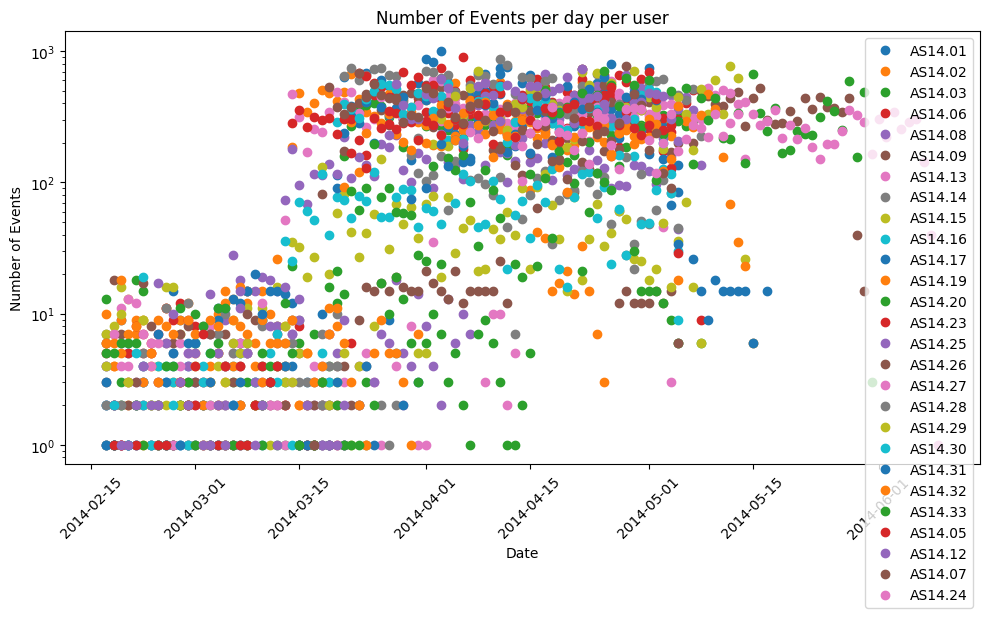

In [49]:
# Check action distribution per user per day

# Convert 'timestamp' column to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

# Group by date and user, then count the number of actions for each user on each day
actions_per_day_per_user = df.groupby([df['time'].dt.date, 'id']).size().reset_index(name='actions_count')

# Calculate the average number of entries per day per user
average_entries_per_user_per_day = actions_per_day_per_user.groupby(['time', 'id'])['actions_count'].sum()

# Print the average number of entries per day per user
print("Average number of entries per day per user:")
print(average_entries_per_user_per_day)


df_reset = average_entries_per_user_per_day.reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))

# Loop through unique IDs
for id in df_reset['id'].unique():
    # Filter DataFrame for each ID
    df_id = df_reset[df_reset['id'] == id]
    # Plot entries for each ID
    plt.plot(df_id['time'], df_id['actions_count'], marker='o', linestyle='', label=id)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Number of Events per day per user')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

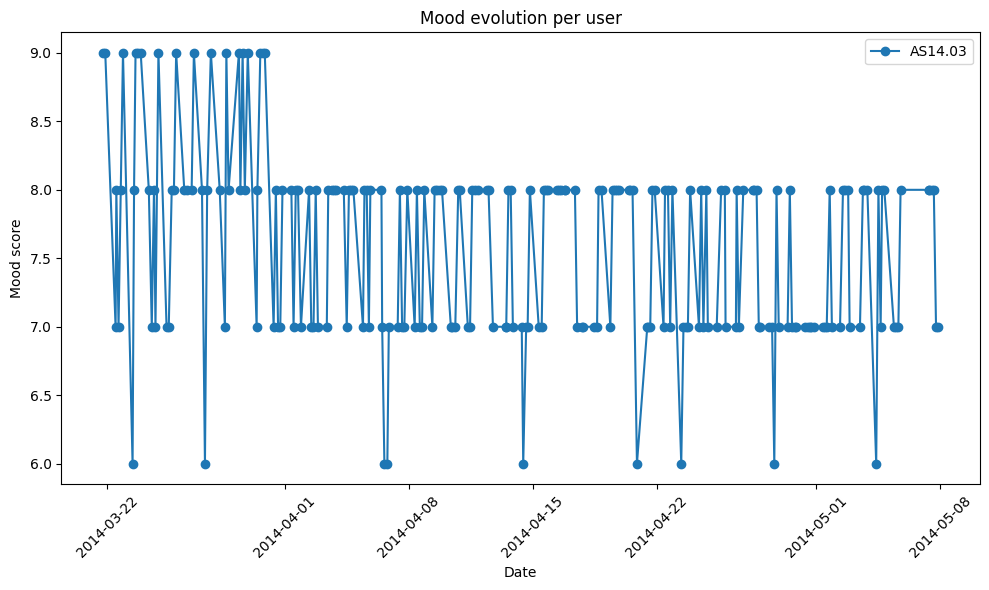

In [50]:
# Check action distribution per user per day

# Convert 'timestamp' column to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

df_reset = df.reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))

# Loop through unique IDs
for id in df_reset['id'].unique():
    if id not in ["AS14.03"]:
        continue
    # Filter DataFrame for each ID
    df_id = df_reset[(df_reset['id'] == id) & (df_reset['variable'] == "mood")]
    # Plot entries for each ID
    plt.plot(df_id['time'], df_id['value'], marker='o', linestyle='-', label=id)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Mood score')
plt.title('Mood evolution per user')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

In [51]:
# Get average mood for every user in every day

df['time'] = pd.to_datetime(df['time'])
df_mood = df[df['variable'] == "mood"]
moods = df_mood.groupby([df['time'].dt.date, 'id'])["value"].mean().reset_index(name='mood')

print(moods)

            time       id      mood
0     2014-02-26  AS14.01  6.250000
1     2014-02-27  AS14.01  6.333333
2     2014-03-04  AS14.17  7.000000
3     2014-03-05  AS14.08  6.333333
4     2014-03-05  AS14.17  8.000000
...          ...      ...       ...
1263  2014-06-04  AS14.24  7.000000
1264  2014-06-05  AS14.24  7.000000
1265  2014-06-06  AS14.24  7.500000
1266  2014-06-07  AS14.24  8.000000
1267  2014-06-08  AS14.24  6.500000

[1268 rows x 3 columns]


Average number of entries per day per user:
time        id     
2014-02-17  AS14.01      2
            AS14.02      6
            AS14.03      1
            AS14.06      5
            AS14.08      4
                      ... 
2014-06-05  AS14.24    288
2014-06-06  AS14.24    302
2014-06-07  AS14.24    142
2014-06-08  AS14.24     40
2014-06-09  AS14.24      1
Name: actions_count, Length: 1973, dtype: int64


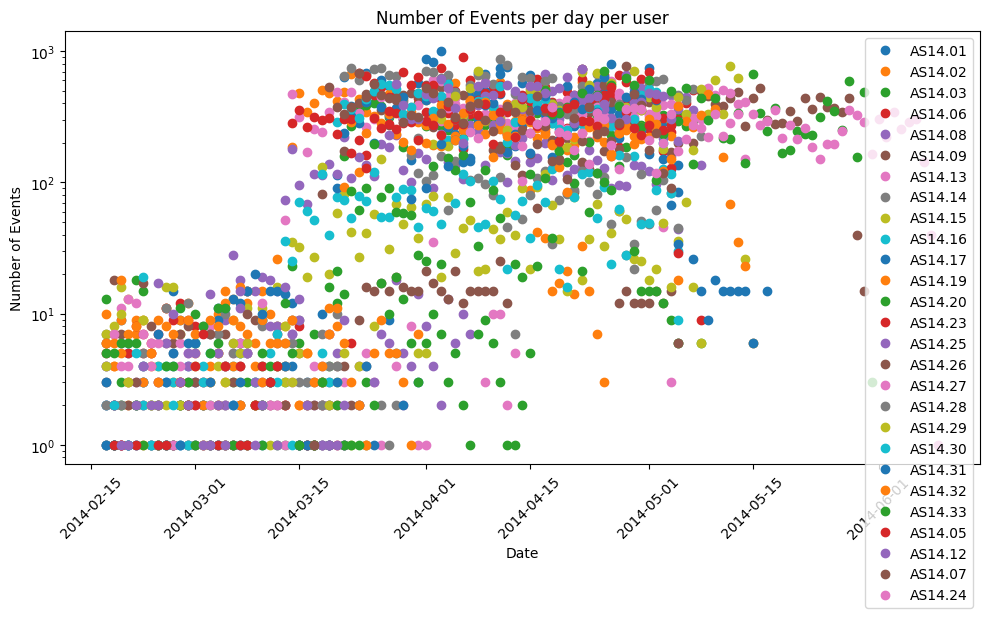

In [52]:
# Check action distribution per user per day

# Convert 'timestamp' column to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

# Group by date and user, then count the number of actions for each user on each day
actions_per_day_per_user = df.groupby([df['time'].dt.date, 'id']).size().reset_index(name='actions_count')

# Calculate the average number of entries per day per user
average_entries_per_user_per_day = actions_per_day_per_user.groupby(['time', 'id'])['actions_count'].sum()

# Print the average number of entries per day per user
print("Average number of entries per day per user:")
print(average_entries_per_user_per_day)


df_reset = average_entries_per_user_per_day.reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))

# Loop through unique IDs
for id in df_reset['id'].unique():
    # Filter DataFrame for each ID
    df_id = df_reset[df_reset['id'] == id]
    # Plot entries for each ID
    plt.plot(df_id['time'], df_id['actions_count'], marker='o', linestyle='', label=id)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Number of Events per day per user')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

In [53]:
# Get input series
# Feature engineer df should have fields:
# ID, time (probe_delta steps), mood (value if new, else the previous, else the next), arousal (same as mood), valence (same as mood), actvity (same as mood), 
# screen (time in that range 1 if 30 minutes, 0.5 if 15 mins...), call (1/0), sms (1/0), appCat.x (same as screen), last day avg mood, 2 days ago avg mood



def overlap_seconds(start1, end1, start2, end2):
    # Determine the maximum of the start times and the minimum of the end times
    start_overlap = np.maximum(start1, start2)
    end_overlap = np.minimum(end1, end2)
    
    # Calculate the duration of overlap in seconds
    overlap_duration = max(0, (end_overlap - start_overlap).total_seconds())
    
    return overlap_duration


# Only use deltas that fit into a day with an int multiplier
# Intervals in seconds:
for probe_delta in [1800]:

    feature_engineered = pd.DataFrame()

    toAdd = []

    for id in df["id"].unique():
        df_id = df[df["id"] == id].sort_values(by="time")
        for day in df_id["time"].dt.date.unique():
            for sec_offset in range(0, 60*60*24, probe_delta):
                # Consider things that have happened between
                start_time = pd.to_datetime(day) + timedelta(seconds=sec_offset)
                end_time = start_time + timedelta(seconds=probe_delta)
                within_time =  df_id[(df_id['time'] >= start_time) & (df_id['time'] <= end_time)]


                # Add variables with duration
                counter = Counter()
                for index, row in df_id[(df_id["time"].dt.date == day) & (df_id["endTime"].notnull())].iterrows():
                    counter[row["variable"]] += overlap_seconds(start_time, end_time, row["time"], row["endTime"])

                # Add mood, arousal, valence
                for val in ["mood", "circumplex.arousal", "circumplex.valence"]:
                    current_mood = df_id[(df_id['time'] >= start_time) & (df_id['time'] <= end_time) & (df_id['variable'] == val)]
                    if current_mood.empty:
                        # Previous moods
                        previous_moods = df_id[(df_id['time'] < start_time) & (df_id['variable'] == val)].sort_values(by="time", ascending=False)
                        if previous_moods.empty:
                            if val in ["mood"]:
                            # If no mood recorded set to 5 (half of the total)
                            # TODO As default use the mean value of the population
                                counter[val] = 5
                            else:
                                # If circumplex.* set to mid value which is 0
                                # TODO As default use the mean value of the population
                                counter[val] = 0
                        else:
                            counter[val] = previous_moods["value"].iloc[0]
                    else:
                        counter[val] = current_mood["value"].mean()
                
                # Add activity (Considering that activity entries refer to the whole hour activity)
                counter["activity"] = df_id[(df_id["time"].dt.floor("h") == start_time.floor("h")) & (df_id["variable"] == "activity")]["value"].sum()

                # Add call/sms
                counter["call"] = within_time[(within_time['variable'] == "call")]["value"].sum()
                counter["sms"] = within_time[(within_time['variable'] == "sms")]["value"].sum()

                # Add last 2 days mean
                for minus_days in range(-2, 0):
                    upper_date = start_time + timedelta(days=minus_days)
                    previous_days_mood_df = df_id[(df_id["time"].dt.floor("D") == upper_date.floor("D")) & (df_id["variable"] == "mood")]
                    if previous_days_mood_df.empty:
                        previous_moods = df_id[(df_id["time"].dt.floor("D") < upper_date.floor("D")) & (df_id["variable"] == "mood")].sort_values(by="time", ascending=False)
                        if previous_moods.empty:
                            previous_moods = counter["mood"]
                        else:
                            previous_moods = previous_moods["value"].iloc[0]
                    else:
                        previous_moods = previous_days_mood_df["value"].mean()
                    counter[str("day"+str(minus_days))] = previous_moods

                # Add new entry to list
                toAdd.append({'ID': id, 'timestamp': str(start_time), 'mood': counter["mood"], 'arousal': counter["circumplex.arousal"], 'valence': counter["circumplex.valence"], 
                            'activity': counter["activity"], 'screen': counter["screen"], 'call': counter["call"], 'sms': counter["sms"], 'appCat.builtin': counter["appCat.builtin"], 
                            'appCat.communication': counter["appCat.communication"], 'appCat.entertainment': counter["appCat.entertainment"], 'appCat.finance': counter["appCat.finance"],
                            'appCat.game': counter["appCat.game"], 'appCat.office': counter["appCat.office"], 'appCat.other': counter["appCat.other"], 'appCat.social': counter["appCat.social"], 
                            'appCat.travel': counter["appCat.travel"], 'appCat.unknown': counter["appCat.unknown"], 'appCat.utilities': counter["appCat.utilities"], 'appCat.weather': counter["appCat.weather"],
                            'mood_day-1': counter["day-1"], 'mood_day-2': counter["day-2"]})
                
    feature_engineered = pd.DataFrame(toAdd)

    # Add target label "next_day_mood"
    df_support = df
    df_support["time"] = df_support[df_support["variable"] == "mood"]["time"].dt.floor("D")
    feature_engineered["day_only"] = pd.to_datetime(feature_engineered["timestamp"]).dt.floor("D")
    df_support = df_support.groupby(["id", "time"]).mean("value")
    feature_engineered = pd.merge(feature_engineered, df_support, left_on=["ID", "day_only"], right_on=["id", "time"]).drop(columns=["day_only", "Unnamed: 0"]).rename(columns={"value": "next_mood"})

    # Make the timestamp integer
    # feature_engineered["timestamp"] = (pd.to_datetime(feature_engineered["timestamp"]).astype(int)) // 10**11
    # feature_engineered["timestamp"] = feature_engineered["timestamp"] - feature_engineered["timestamp"].min()

    print("Created dataset with "+str(probe_delta)+" seconds interval time.")

    feature_engineered.to_csv("feat_eng_"+str(probe_delta)+".csv")


Created dataset with 1800 seconds interval time.
